<a href="https://colab.research.google.com/github/kinuthia-mark/Airplane_Crashes_Data_Cleaning/blob/main/Question_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

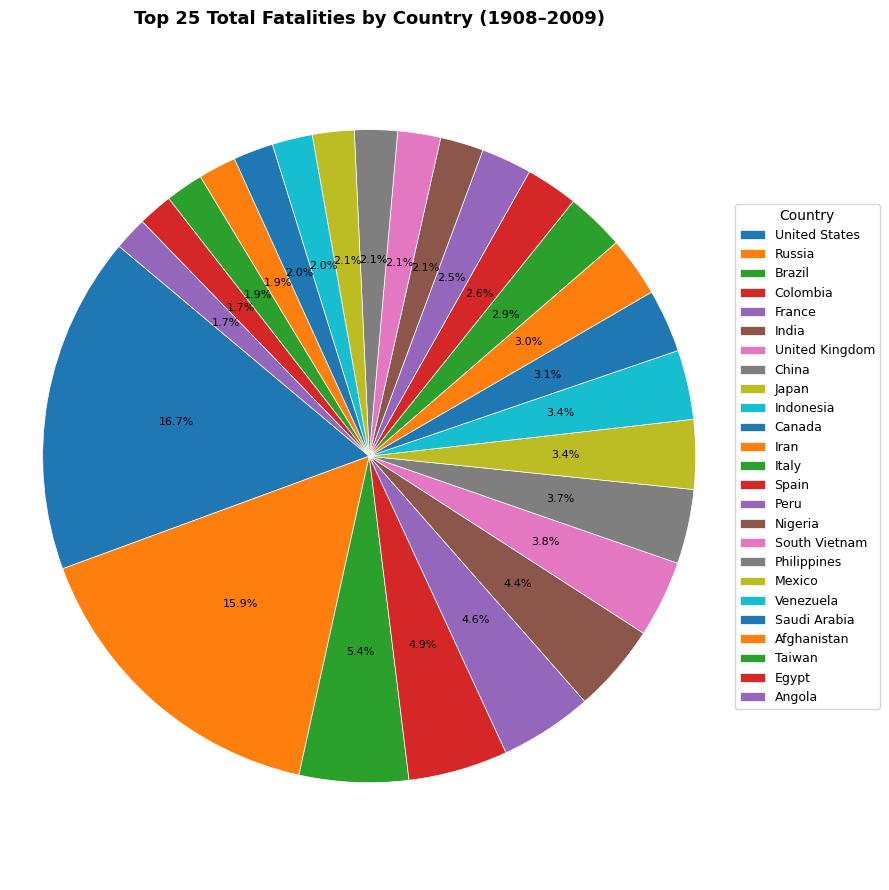

In [4]:
# Question 10: Top 25 Total Fatalities by Country (Pie Chart)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv', encoding='latin1')

# Keep only Location & Fatalities columns
fl = df[['Location', 'Fatalities']].copy()
fl['Fatalities'] = pd.to_numeric(fl['Fatalities'], errors='coerce')

# Extract proper country names to fix wrong data
def extract_country(location):
    if pd.isna(location):
        return np.nan
    parts = [p.strip() for p in str(location).split(',')]
    last = parts[-1].title().strip()
    # Normalize common cases
    if last in [
        'California', 'New York', 'Texas', 'Florida', 'Alaska', 'Hawaii',
        'Nevada', 'Washington', 'Illinois', 'Arizona', 'Colorado',
        'Ohio', 'Pennsylvania', 'Michigan', 'Georgia'
    ]:
        return 'United States'
    if last in ['U.K.', 'England', 'Scotland', 'Wales']:
        return 'United Kingdom'
    if last in ['Russia (Soviet Union)', 'U.S.S.R.', 'Soviet Union', 'Ussr']:
        return 'Russia'
    return last

fl['Country'] = fl['Location'].apply(extract_country)

# Group and sum fatalities by country
country_sum = fl.groupby('Country', dropna=True)['Fatalities'].sum().sort_values(ascending=False)
top25 = country_sum.head(25)

# pie chart plot
plt.figure(figsize=(9,9))
wedges, texts, autotexts = plt.pie(
    top25,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor':'w', 'linewidth':0.5},
    textprops={'fontsize':8}
)

# Add a legend
plt.legend(
    wedges,
    top25.index,
    title='Country',
    loc='center left',
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=9
)

plt.title('Top 25 Total Fatalities by Country (1908–2009)', fontsize=13, weight='bold')
plt.axis('equal')  # keep circle shape
plt.tight_layout()
plt.show()
